In [13]:
import astropy.io.fits as fits
import pylab as pl
import numpy as np

from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u

In [8]:
orig = Table.read('/global/cscratch1/sd/mjwilson/DESILBG/tomog/tomog-orig.fits')

In [43]:
np.any(latest['uS'] == -99.)

False

In [9]:
orig

ID,RA,DEC,TRACT,PATCH,MASK,FLAG_FIELD,FLAG_FIELD_BINARY [5],u,uS,g,r,i,z,y,Yv,J,H,Ks,u_err,uS_err,g_err,r_err,i_err,z_err,y_err,Yv_err,J_err,H_err,Ks_err,Z_SPEC,NBAND_USED,CHI_BEST,CHI_STAR,CHI_QSO,Z_ML,Z_QSO,MOD_BEST_BC03,AGE_BEST,EBV_BEST,EXTLAW_BEST,AGE_MED,MASS_MED,MASS_BEST,SFR_MED,SFR_BEST,SSFR_MED,SSFR_BEST,OBJ_TYPE,ZPHOT,g_cmodel_mag,r_cmodel_mag,i_cmodel_mag,z_cmodel_mag,r_extendedness_value,photoz_best,photoz_conf_best,photoz_risk_best,uSc,uW,uW_err
int64,float64,float64,int64,bytes3,int16,int16,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64
2226395,151.01367434970564,1.12661166990401,9571,"4,6",1,3,True .. False,24.885,0.0,24.246,24.174,24.13,24.137,23.982,-99.026,-99.019,-99.012,-99.008,0.025,1000.0,0.019,0.027,0.035,0.056,0.117,-99.0,-99.0,-99.0,-99.0,-99.0,6,0.167446,6.0964,2.70485,2.3808,2.56,11,404154000.0,0.1,1,850326000.0,10.0084,9.92983,1.2033,1.16136,-8.8612,-8.76848,0.0,2.3808,25.156696,25.022001,24.827686,24.611626,1.0,1.91,0.23094893,0.29984626,-0.005986900792421968,24.884999984443134,0.0249999999921875
2178175,151.27365532977564,1.4798287327336377,9571,"3,8",1,3,True .. False,25.787,0.0,24.384,24.013,23.905,23.748,23.9,-99.034,-99.025,-99.016,-99.01,0.064,1000.0,0.023,0.028,0.03,0.04,0.116,-99.0,-99.0,-99.0,-99.0,-99.0,6,2.14991,3.00284,4.77007,2.748,2.96,12,9999980.0,0.3,1,593677000.0,10.4418,9.45058,1.80193,2.47125,-8.68945,-6.97933,0.0,2.748,24.680555,24.167284,24.029915,23.842045,1.0,0.3,0.19656159,0.55553466,0.0275429410252842,25.786999894489263,0.063999999868928
3823277,150.23978060026042,2.179429410155428,9813,"4,4",1,63,True .. True,26.948,26.785,25.066,24.359,24.129,24.106,24.085,24.192,23.929,23.153,22.781,0.188,0.123,0.025,0.017,0.015,0.024,0.043,0.043,0.043,0.027,0.028,-99.0,11,15.0894,155.271,52.1077,3.0846,3.24,10,286119000.0,0.1,2,307696000.0,10.2981,10.2013,1.6485,1.14449,-8.77981,-9.05678,0.0,3.0846,24.940155,24.180016,24.233614,24.242811,1.0,0.47,0.43806845,0.43914586,26.850221960593007,26.87953038208942,0.10292796851677252
3484732,150.70462758276636,1.9365794467909687,9813,"2,2",1,31,True .. True,27.36,26.907,24.389,23.328,23.149,23.06,23.078,23.051,23.287,23.064,22.356,0.277,0.244,0.016,0.007,0.007,0.011,0.021,0.042,0.064,0.07,0.057,-99.0,11,27.809,125.226,41.2045,3.4108,3.42,11,101518000.0,0.2,1,106190000.0,10.3041,10.2839,2.30446,2.30738,-7.97882,-7.97649,0.0,3.4108,24.448158,23.458134,23.205385,23.089863,1.0,0.48,0.5850117,0.097656615,27.011919499066146,27.164000522833057,0.18309540071312932
1892377,149.33054172318603,1.1192623858492332,9570,"6,6",1,7,True .. False,27.103,-99.094,24.995,24.395,23.922,23.871,22.992,-99.024,-99.018,-99.011,-99.007,0.235,-99.0,0.046,0.036,0.033,0.046,0.049,-99.0,-99.0,-99.0,-99.0,-99.0,6,28.2574,51.6346,9.88444,2.47,2.66,7,2000000000.0,0.5,1,1632560000.0,11.7336,11.7841,2.63823,2.65419,-9.11475,-9.12989,0.0,2.47,25.596294,24.935436,25.28746,25.365988,1.0,0.98,0.07129459,0.55501574,-99.04077701290028,27.103,0.235
2323414,150.94255444097536,1.26464862710345,9571,"5,7",1,3,True .. False,25.586,0.0,24.616,24.363,24.111,24.017,23.901,-99.028,-99.02,-99.013,-99.008,0.047,1000.0,0.026,0.033,0.032,0.05,0.117,-99.0,-99.0,-99.0,-99.0,-99.0,6,0.178448,10.955,0.800461,0.126,0.7,3,904792000.0,0.2,2,1615810000.0,7.17155,7.09784,-1.96482,-1.8791,-9.12642,-8.97694,0.0,0.126,24.73399,24.454967,24.301638,24.371613,1.0,2.49,0.12480963,0.50488263,0.014310428200905317,25.585999943512135,0.0469999999480885
3524476,150.6623829643495,2.3286839623938045,9813,"2,4",1,31,True .. True,24.741,24.705,24.007,23.846,23.589,23.35,23.301,23.329,22.514,22.541,21.992,0.029,0.033,0.011,0.012,0.011,0.014,0.026,0.047,0.

In [10]:
latest = Table.read('/global/cscratch1/sd/mjwilson/DESILBG/tomog/tomog.fits')

In [44]:
np.any(latest['uS'] == -99.)

False

In [15]:
sc_orig = SkyCoord(ra=orig['RA']*u.degree, dec=orig['DEC']*u.degree)
sc_latest = SkyCoord(ra=latest['RA']*u.degree, dec=latest['DEC']*u.degree)

idx, d2d, d3d = sc_orig.match_to_catalog_sky(sc_latest)

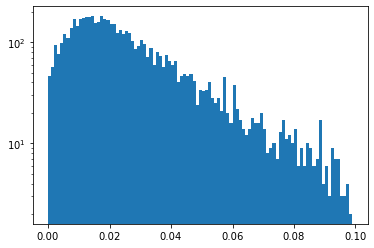

In [18]:
pl.hist(d2d.arcsec, bins=np.arange(0.0, 0.1, 0.1 / 100.))
pl.yscale('log')

In [35]:
idx = idx[d2d.arcsec < 1.0]

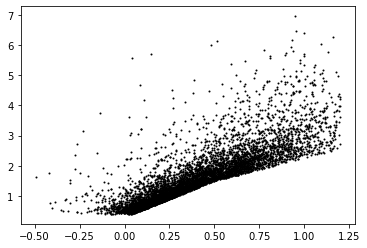

In [39]:
pl.plot(latest['g'][idx] - latest['r'][idx], latest['uW'][idx] - latest['g'][idx], marker='.', c='k', lw=0.0, markersize=2.)

In [67]:
unmatched = orig[d2d.arcsec > 1.0]

Text(0, 0.5, 'uW-g')

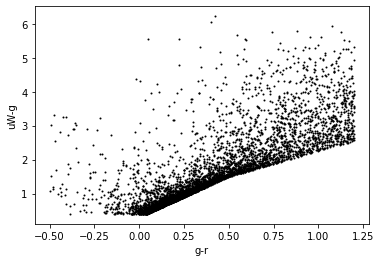

In [87]:
pl.plot(unmatched['g'] - unmatched['r'], unmatched['uW'] - unmatched['g'], marker='.', c='k', lw=0.0, markersize=2.)

pl.xlabel('g-r')
pl.ylabel('uW-g')

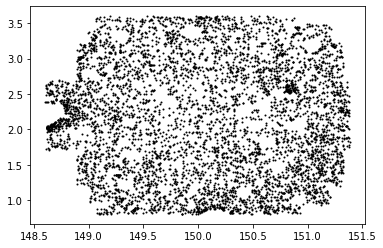

In [69]:
pl.plot(unmatched['RA'], unmatched['DEC'], marker='.', lw=0.0, c='k', markersize=2)

Text(0.5, 0, 'uW')

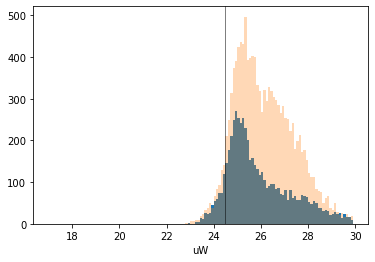

In [85]:
pl.hist(unmatched['uW'], bins=np.arange(17., 30., 0.1))
pl.hist(latest['uW'], bins=np.arange(17., 30., 0.1), alpha=0.3)

pl.axvline(x=24.5, c='k', lw=0.5)
pl.xlabel('uW')

In [54]:
matches = latest['RA', 'DEC', 'u', 'uS', 'uW', 'FLAG_FIELD_BINARY'][idx]

In [55]:
matches.sort('uS')

In [65]:
matches['u', 'uS', 'uW'].pprint()

   u       uS           uW        
------- ------- ------------------
 25.744 -99.127             25.744
 26.988 -99.119             26.988
 27.528 -99.117             27.528
 27.525 -99.113             27.525
 27.585 -99.112             27.585
 25.803 -99.111             25.803
 29.398 -99.108             29.398
 29.472 -99.107             29.472
 28.138 -99.106             28.138
 28.942 -99.106             28.942
    ...     ...                ...
 28.709  30.508 28.810445296001614
-99.085  30.577 30.690217854566182
-99.092  30.606 30.695892747214735
 31.984  30.634 30.851817911080712
-99.085  30.721 30.816387604235025
-99.085  30.872  30.96963040301882
 28.344  30.872 28.347583184640328
 28.158  31.019 28.161247205892252
-99.084  31.181 31.271341306971493
 27.907  31.768 27.907482795279975
 27.555  31.887 27.555326300124143
Length = 6335 rows
